In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

/Users/piyushpandita/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


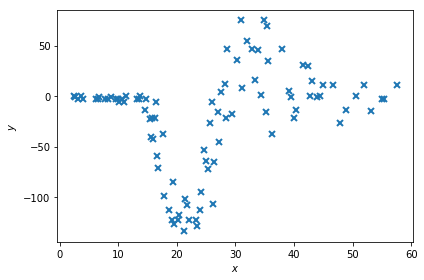

In [2]:
data = np.loadtxt('../data/motor.dat')
X = data[:, 0][:, None]
Xm = np.mean(X)
Xv = np.std(X)
Xnorm = (X - Xm)/Xv
Y = data[:, 1]
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [3]:
#build the model
k = gpflow.kernels.RBF(input_dim=1)
noisekern = gpflow.kernels.RBF(input_dim=1, ARD=True)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptiveLengthscale2D(Xnorm, Y[:, None], k, nonstat, noisekern)

In [4]:
#m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kerns["ell0"].variance.prior = gpflow.priors.Gaussian(0, 1.)
m.kerns["ell0"].lengthscales.prior = gpflow.priors.Gaussian(0, 1.)
# m.likelihood.variance = 0.01
# m.likelihood.variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)
m.noisekern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
#m.kern2.variance.prior = gpflow.priors.Gamma(1., 1.)
# m.noisekern.variance.fixed = True
m.noisekern.variance.prior = gpflow.priors.Gamma(1., 1.)

In [5]:
m.optimize(maxiter=500)

      fun: array([687.02859215])
 hess_inv: <287x287 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.07938865e-03,  7.80406860e-04,  1.52370693e-03, -2.94290659e-04,
        1.43128630e-04,  1.04161928e-03,  2.44864750e-04,  2.16853899e-04,
        4.89125895e-04,  2.80044169e-04,  2.66167398e-04,  2.83536734e-04,
        1.92612604e-04,  1.52495784e-04,  1.43378385e-04,  1.60057632e-04,
        1.29599898e-04,  2.54922689e-04,  1.05386442e-04,  7.47128481e-05,
        1.42657018e-04,  9.31039762e-05,  1.23004152e-04,  8.47543022e-05,
        6.99893861e-05,  6.48330870e-05,  6.13125134e-05,  5.95534493e-05,
        5.94086597e-05,  5.83062280e-05,  1.05584289e-04,  6.74572239e-05,
        1.02124476e-04,  9.70875752e-05,  6.47269817e-05,  5.76723714e-05,
        9.65579368e-05,  7.44042842e-05,  1.18790610e-04,  7.14256244e-05,
        7.13523373e-05,  5.50996014e-05,  1.08388428e-04,  4.90011854e-05,
        6.03801406e-05,  4.25424799e-05,  4.98937979e-05,  5.41143948e-

In [6]:
samples = m.sample(20, verbose=True, epsilon=0.00005, thin = 2, burn = 100, Lmax = 160)

burn-in sampling started
Iteration:  100 	 Acc Rate:  98.0 %
burn-in sampling ended


In [8]:
sample_df = m.get_samples_df(samples)

In [9]:
mean_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

NameError: name 'xx' is not defined

In [ ]:
xnew = np.linspace(0, 60, 50)[:,None]
xx = (xnew - Xm) / Xv

In [ ]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_l(xx)
    var1 = v1[:,:]
    mean_l_mat[i,:] = mean1[:,0]
    var_l_mat[i,:] = np.diag(var1)

std_l_mat = np.sqrt(var_l_mat)

In [ ]:
LowerlogL = mean_l_mat - 2*std_l_mat
UpperlogL = mean_l_mat + 2*std_l_mat

In [ ]:
MeanL = np.exp(mean_l_mat)
LowerL = np.exp(LowerlogL)
UpperL = np.exp(UpperlogL)

In [ ]:
def visualize(Xgrid, M, L, U):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    
    line, = plt.plot(Xgrid, M, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], L, U,
                     color = 'b', alpha = 0.25)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

In [ ]:
mini = 50
maxi = 110
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize(xnew, MeanL[i,:], LowerL[i,:], UpperL[i,:])  

In [ ]:
v1.shape

In [ ]:
mean_n_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_n_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

In [ ]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_n(xx)
    var1 = v1[:,:]
    mean_n_mat[i,:] = mean1[:,0]
    var_n_mat[i,:] = np.diag(var1)

std_n_mat = np.sqrt(var_n_mat)

In [ ]:
LowerlogN = mean_n_mat - 2*std_n_mat
UpperlogN = mean_n_mat + 2*std_n_mat

In [ ]:
MeanN = np.exp(mean_n_mat)
LowerN = np.exp(LowerlogN)
UpperN = np.exp(UpperlogN)

In [ ]:
mini = 50
maxi = 151
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize(xnew, MeanN[i,:], LowerN[i,:], UpperN[i,:])  

In [ ]:
sig_samples = m.signal_variance.get_samples_df(samples.T)
signal_var = np.array([])
for s in sig_samples:
    signal_var = np.append(signal_var, s)

In [ ]:
mean_f_mat = np.zeros(shape = (samples.T.shape[0], xx.shape[0]))
var_f_mat = np.zeros(shape = (samples.T.shape[0], xx.shape[0]))

for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_f(xx)
    var1 = v1[:,:,0]
    mean_f_mat[i,:] = mean1[:,0]
    var_f_mat[i,:] = np.diag(var1)    

In [ ]:
std_f_mat = np.sqrt(var_f_mat)

In [ ]:
Lowerf = mean_f_mat - 2*std_f_mat
Upperf = mean_f_mat + 2*std_f_mat

In [ ]:
def visualize_all(Xgrid, M1, L1, U1, U2):
    """
    Visualize
    """  
    L2 = L1 - U2
    U2 = U1 + U2
    
    plt.plot(X, Y, '.')
    line, = plt.plot(Xgrid, M1, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], L1, U1,
                     color = 'b', alpha = 0.25)
    plt.fill_between(Xgrid[:,0], L2, U2,
                     color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

In [ ]:
mini = 0
maxi = 1
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize_all(xnew, mean_f_mat[i,:],
              Lowerf[i,:], Upperf[i,:],
              UpperN[i,:])